In [5]:
from generator import build_generator
from solver import ResNet18_6_Parted_NoPooling as build_solver
import cv2
import numpy as np
img_shape = (40,120,4)

generator = build_generator(g_power = 120, img_shape = img_shape)
solver = build_solver(input_shape=img_shape, size = 1, classes=10, weight_decay=5e-4)
generator.load_weights('./generator_weights.h5')
solver.load_weights('./solver_weights.h5')

In [67]:
from time import time

start = time()

img_array = cv2.imread('672220.png',cv2.IMREAD_UNCHANGED)
img_array = (img_array / 127.5) -1 
img_array = np.array( [img_array,])
converted_img = generator.predict(img_array)
converted_img = np.round((converted_img+1)*127.5).astype('uint8')
answer = solver.predict(converted_img)
answer = list(map(lambda x : np.argmax(x), answer))
answer = ''.join(map(str,answer))
print(time()-start)

0.3210744857788086


In [62]:
from PIL import Image

img = Image.fromarray(converted_img[0])

672220


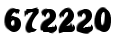

In [63]:
print(answer)
img

In [3]:
from predictCaptcha import PredictCaptcha

/home/jegal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
predictor = PredictCaptcha()

In [5]:
import cv2

predictor.predict(cv2.imread('672220.png',cv2.IMREAD_UNCHANGED))

'672220'